Cyna Shirazinejad, 3/2/22

# Notebook 8d: compare CCP lifetimes (all single DNM2 peak events) between DMSO and CK666 treatments


##### import all necessary Python modules

In [24]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
import numpy as np
import pandas as pd
import sys
import matplotlib.pyplot as plt
import pickle
from IPython.display import Image
from scipy import signal
import scipy.stats as stats
import seaborn as sns

analysis_metadata = np.load('analysis_metadata.npy', allow_pickle=True)
sys.path.append(analysis_metadata.item().get('path_notebook')+'/cmeAnalysisPostProcessingSimplified') # add custom Python scripts to the local path
import separate_tracking_merge_tools
import merge_tools
import generate_index_dictionary
import return_track_attributes
import feature_extraction_modular
index_dictionary = generate_index_dictionary.return_index_dictionary()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
analysis_metadata

array({'path_outputs': '/Volumes/GoogleDrive/My Drive/Drubin Lab/ap2dynm2arcp3_project/stable_outputs_20220211', 'path_notebook': '/Users/cynashirazinejad/Documents/GitHub/Jin_Shirazinejad_et_al_branched_actin_manuscript/analysis/simplified_workflow_20220211', 'feature_units': ['seconds', 'a.u. fluorescence', 'a.u. fluorescence', 'pixels', 'pixels', 'pixels', 'pixels', 'pixels', 'seconds', 'seconds', 'seconds', 'seconds', 'seconds', 'a.u. fluorescence', 'a.u. fluorescence', 'a.u. fluorescence', 'a.u. fluorescence', 'a.u. fluorescence', 'unitless', 'a.u. fluorescence', 'a.u. fluorescence', 'a.u. fluorescence**2', 'a.u. fluorescence**2', 'unitless', 'unitless', 'unitless', 'unitless', 'counts', 'counts', 'unitless', 'unitless', 'unitless'], 'possible_track_features': ['lifetime', 'max_int_ch0', 'max_int_ch1', 'dist_traveled_ch0', 'dist_traveled_ch1', 'max_dist_between_ch0-ch1', 'md_ch0', 'md_ch1', 'time_to_peak_ch0', 'time_to_peak_ch1', 'time_after_peak_ch0', 'time_after_peak_ch1', 'time

# load all valid arpc3 tracks

In [3]:
experiment = 'ada_ck666_dmso'

In [4]:
experiment_metadata = analysis_metadata.item().get('experiment_groups')[experiment]
num_tracks = experiment_metadata['number_of_track_splits']
name_tracks = experiment_metadata['tracks']
path_tracks_secondary = experiment_metadata['tracks_secondary']
name_secondary_structures = experiment_metadata['name_secondary_structures']
df_experiment = experiment_metadata['df']
path_outputs = analysis_metadata.item().get('path_outputs')
df_experiment = pd.read_csv(path_outputs+'/dataframes/'+df_experiment+'.zip')

# load all valid tracks ap2/dnm2 tracks from arpc3 line

In [5]:
merged_all_valid_tracks = np.load(path_outputs+
                              '/dataframes/'+
                              name_tracks+
                              '_0.npy', allow_pickle=True)
for i in range(1, num_tracks):
    print(i)
    merged_all_valid_tracks = np.concatenate((merged_all_valid_tracks,
                                             np.load(path_outputs+
                                             '/dataframes/'+
                                             name_tracks+
                                             '_'+
                                             str(i)+
                                             '.npy', allow_pickle=True)))

1
2
3
4
5
6
7
8


In [6]:
merged_all_valid_tracks.shape

(55964,)

# sort DNM2+ events

In [7]:
number_of_clusters = analysis_metadata.item().get('number_of_clusters')

num_gmm_clusters = number_of_clusters # optimal number of clusters of PCA data


gmm_classes = []

df = df_experiment

for i in range(num_gmm_clusters):

    gmm_classes.append(df[df['gmm_predictions']==i].index.values)    

In [8]:
index_dnm2positive = analysis_metadata.item().get('index_DNM2positive')

In [9]:
len(gmm_classes[index_dnm2positive])

5245

In [15]:
merged_dnm2_positive_dmso = merged_all_valid_tracks[gmm_classes[index_dnm2positive]] #dnm2 positive events, mixed CCPS and hot-spots

In [25]:
track_features = feature_extraction_modular.TrackFeatures(merged_dnm2_positive_dmso) # an instance of a to-be feature matrix of tracks
track_features.add_features(['lifetime']) # set the features to be extracted
track_features.extract_features() # extract all features
track_features_dmso = track_features.feature_matrix # feature matrix for all tracks

In [26]:
track_features_dmso

array([[217],
       [210],
       [203],
       ...,
       [  4],
       [  3],
       [  3]], dtype=uint8)

# load all valid arpc3 tracks

In [16]:
experiment = 'ada_ck666_ck666'

In [17]:
experiment_metadata = analysis_metadata.item().get('experiment_groups')[experiment]
num_tracks = experiment_metadata['number_of_track_splits']
name_tracks = experiment_metadata['tracks']
path_tracks_secondary = experiment_metadata['tracks_secondary']
name_secondary_structures = experiment_metadata['name_secondary_structures']
df_experiment = experiment_metadata['df']
path_outputs = analysis_metadata.item().get('path_outputs')
df_experiment = pd.read_csv(path_outputs+'/dataframes/'+df_experiment+'.zip')

# load all valid tracks ap2/dnm2 tracks from arpc3 line

In [18]:
merged_all_valid_tracks = np.load(path_outputs+
                              '/dataframes/'+
                              name_tracks+
                              '_0.npy', allow_pickle=True)
for i in range(1, num_tracks):
    print(i)
    merged_all_valid_tracks = np.concatenate((merged_all_valid_tracks,
                                             np.load(path_outputs+
                                             '/dataframes/'+
                                             name_tracks+
                                             '_'+
                                             str(i)+
                                             '.npy', allow_pickle=True)))

1
2
3
4
5
6
7
8


In [19]:
merged_all_valid_tracks.shape

(52684,)

# sort DNM2+ events

In [20]:
number_of_clusters = analysis_metadata.item().get('number_of_clusters')

num_gmm_clusters = number_of_clusters # optimal number of clusters of PCA data


gmm_classes = []

df = df_experiment

for i in range(num_gmm_clusters):

    gmm_classes.append(df[df['gmm_predictions']==i].index.values)    

In [21]:
index_dnm2positive = analysis_metadata.item().get('index_DNM2positive')

In [22]:
len(gmm_classes[index_dnm2positive])

4249

In [27]:
merged_dnm2_positive_ck666 = merged_all_valid_tracks[gmm_classes[index_dnm2positive]] #dnm2 positive events, mixed CCPS and hot-spots

In [33]:
track_features = feature_extraction_modular.TrackFeatures(merged_dnm2_positive_ck666) # an instance of a to-be feature matrix of tracks
track_features.add_features(['lifetime']) # set the features to be extracted
track_features.extract_features() # extract all features
track_features_ck666 = track_features.feature_matrix # feature matrix for all tracks

In [34]:
track_features_ck666

array([[216],
       [213],
       [208],
       ...,
       [  6],
       [  5],
       [  4]], dtype=uint8)

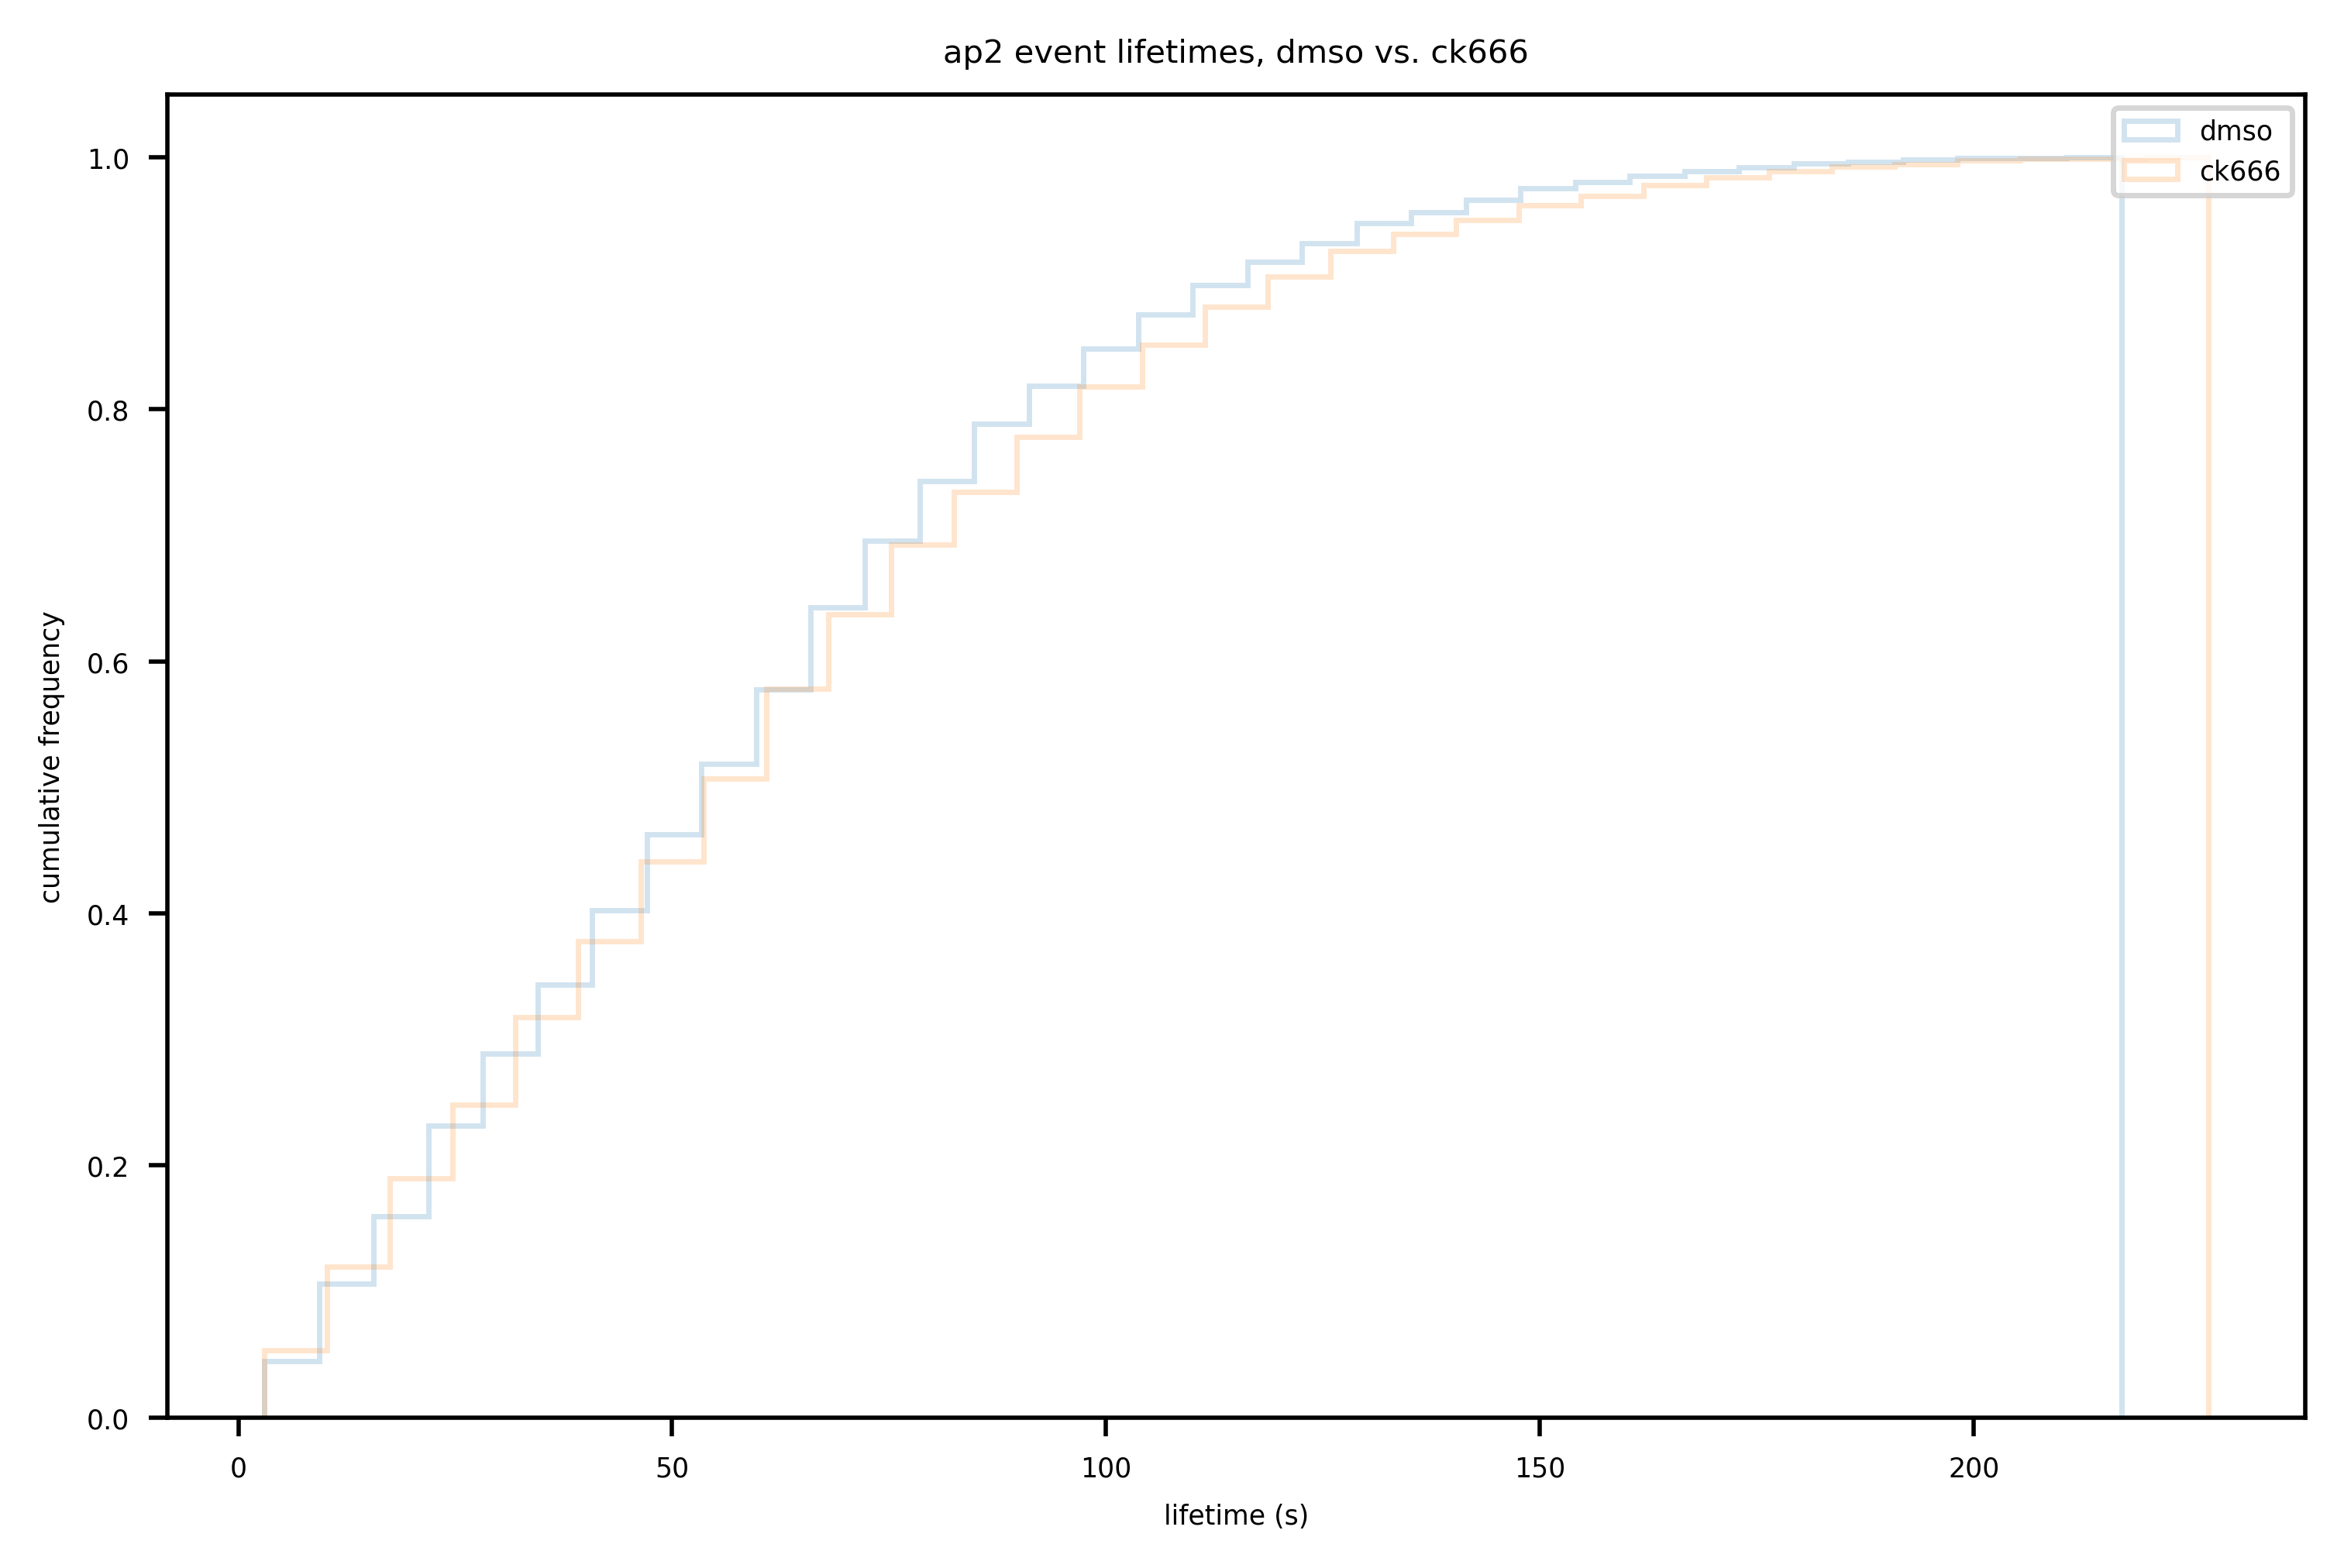

In [39]:
plt.rcParams['figure.dpi']=500
plt.rcParams['figure.figsize']=(6,4)
plt.hist(track_features_dmso, alpha=0.2, label='dmso', bins='auto', density=True, cumulative=True, histtype='step')
plt.hist(track_features_ck666, alpha=0.2, label='ck666', bins='auto', density=True, cumulative=True, histtype='step')
plt.rcParams.update({'font.size': 5})
plt.xlabel('lifetime (s)')
plt.ylabel('cumulative frequency')
plt.title('ap2 event lifetimes, dmso vs. ck666')
plt.legend()
plt.tight_layout()
# plt.savefig(unique_user_saved_outputs+'/plots/fig_4a_ccplifetimes_plusminus_arpc3_histogram_density_sigdnm2peak_zeropadding.png')